## Predicting House's price using Linear Regression

We are going to use dataset from [Kaggle's House Prices Dataset.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), which contains train and test data.


<img src="img/houses.jpg" width="40%">

### 1.- Import our modules

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10.0, 5.0)

### 2.- Reading dataset

In [19]:
data_dir = "./data"
train_path = os.path.join(data_dir, "train.csv")
test_path = os.path.join(data_dir, "test.csv")

data = pd.read_csv(train_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.- Exploratory Analysis

#### 3.1.- Analyze the features and target

First of all, we need to find what we want to predict. We can see the last column has the name <b>SalePrice</b>, which is the value of the house and contains continuous values. That column would be our target.

In [20]:
print(data.columns)
print("Number of columns: {}".format(len(data.columns)))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
price = data["SalePrice"]
data.drop(labels = ["SalePrice"], axis = 1, inplace = True)
data.insert(0, "SalePrice", price)
data.head()

,SalePrice,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,181500,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,223500,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,140000,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,250000,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


There are too many features and most of them does not have relationship with the price, for example: 

In [22]:
#data.describe()

In [23]:
#data.info()

In [24]:
# Find the column that contains most null values.
# data.isnull().sum()
# PoolQC is the column that contains most null values. 

#### 3.2.- Correlation Matrix and heatmap

Then, we need to find relationships between the featues/dimentions in order to find any reasonable candidates to be part of our model, which we do not know yet what would be.

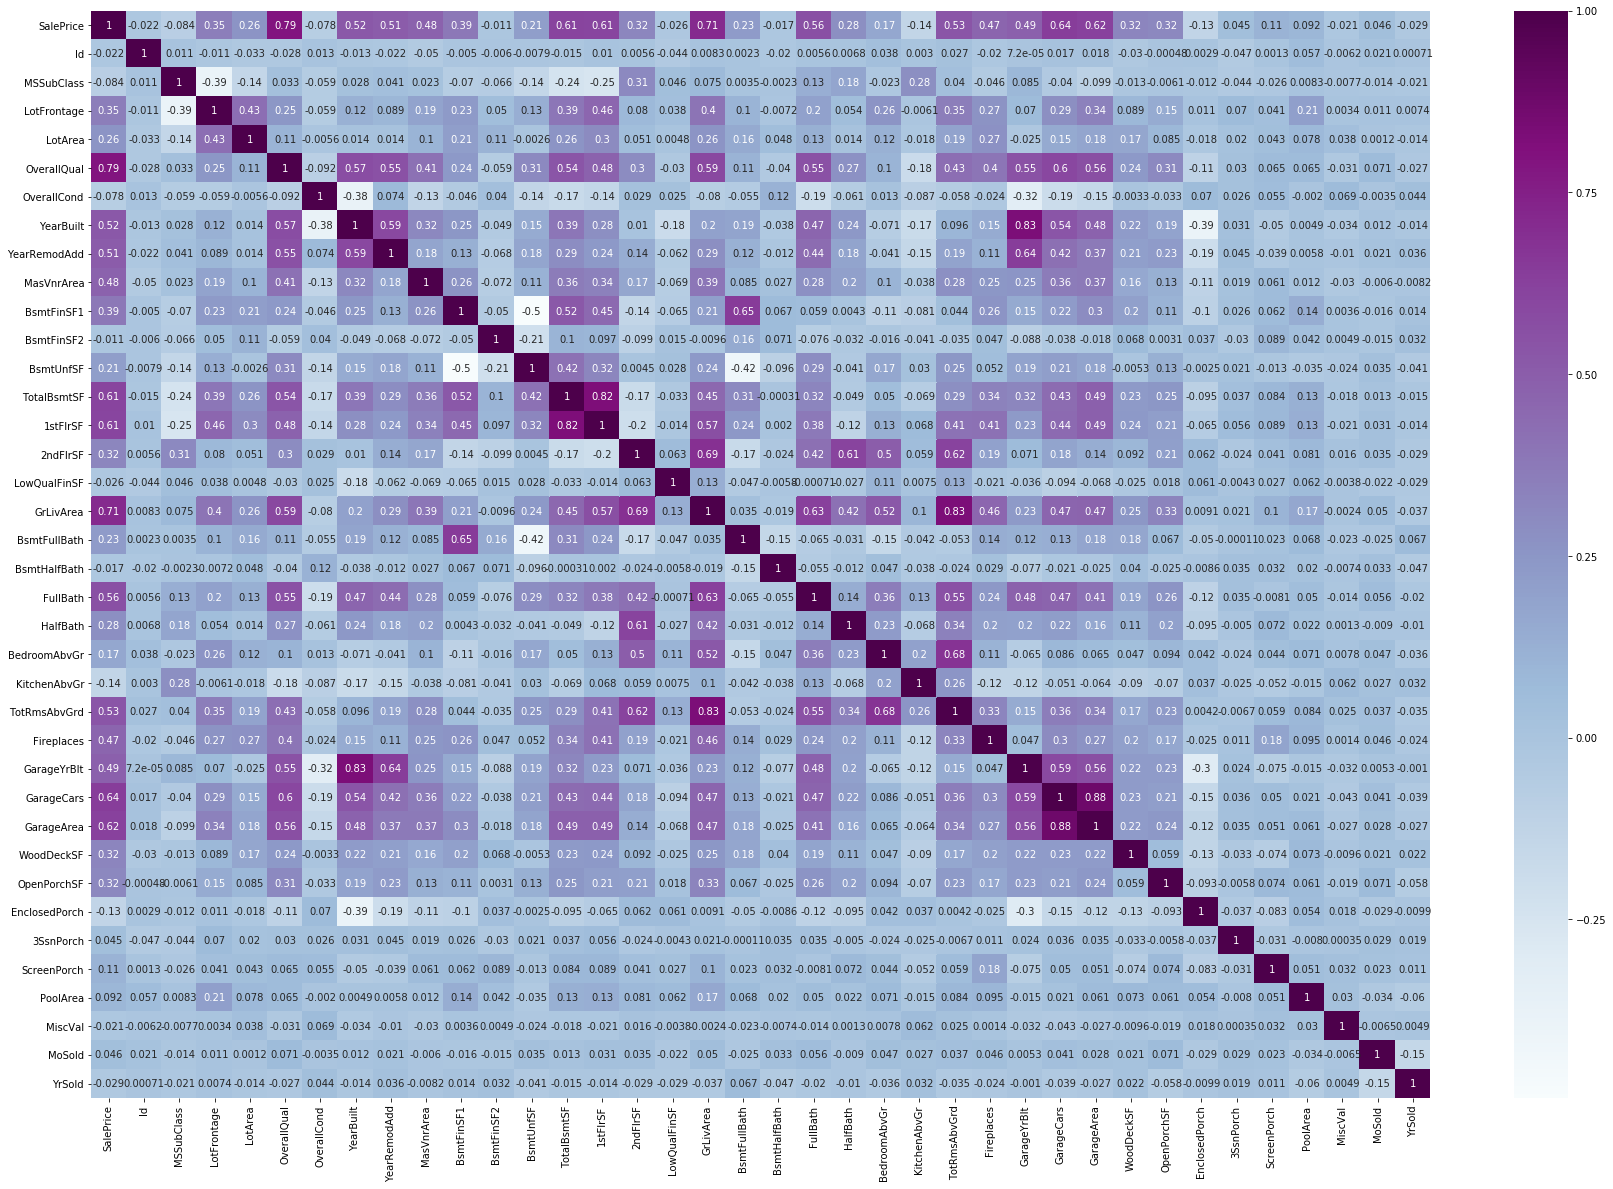

In [25]:
plt.rcParams['figure.figsize'] = (30, 20)
corr = data.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='BuPu',
            annot=True)

#### 3.3.- Plotting data

We have found that there are some features that are proportional to the <b>SalePrice</b> for example: 

* GrLivArea
* YearBuilt

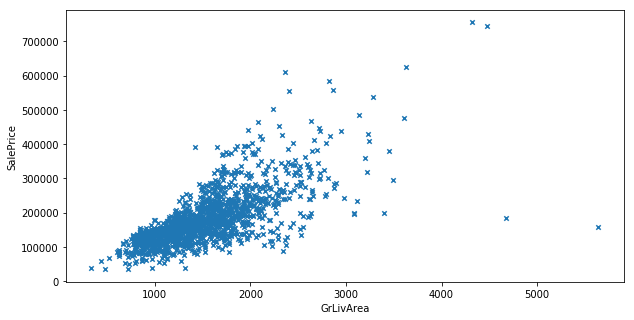

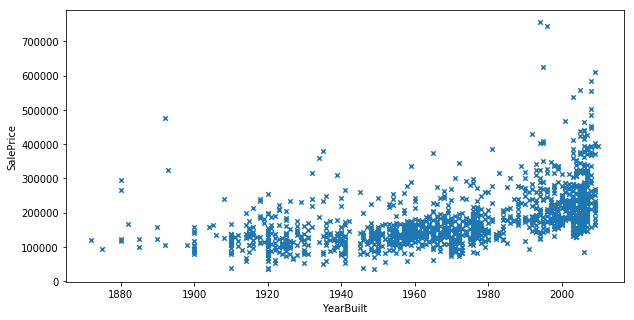

In [26]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x')
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x')

#### 3.5.- Cleanning the Data based on some assumptions

In [28]:
def read_to_df(file_path):
    return pd.read_csv(file_path)

def select_columns(data_frame, column_names):
    return data_frame[column_names] 

df = pd.read_csv(train_path)
for i in range(4):
    cols = np.random.choice(df.columns, replace = False)
    #print(cols)
    stu = select_columns(df, cols)
    sol = df[cols]
    assert stu.shape == sol.shape

def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    for column_limits in cutoffs:
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:] 
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset

# We create utilities functions that can help us to delete some rows
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
print("shape of data before cutoff: {}".format(df.shape))
selected_data = column_cutoff(df, cutoffs)
print("shape of data after cutoff: {}".format(selected_data.shape))
selected_data.head()

shape of data before cutoff: (1460, 81)
shape of data after cutoff: (1451, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.- Modeling

In this step, we need to try all the models we know in order to obtain the best metrics.

#### 3.1.- Creating our Linear Regression from scratch


$$w_{LS} = (X^T X)^{−1}X^T y,$$

In [29]:
def least_squares_weights(input_x, target_y):
    #Check shapes of input matricies. If wide and not long, switch 
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    if target_y.shape[0] < target_y.shape[1]: 
        target_y = np.transpose(target_y)
    # Prepend ones to x matrix
    ones = np.ones((len(target_y), 1), dtype=int)
    augmented_x = np.concatenate((ones, input_x), axis=1)
    # Perform linear algebra with numpy
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x),augmented_x)), np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, target_y)
    return w_ls

training_y = np.array([[208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000]])
training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
weights = least_squares_weights(training_x, training_y)
print(weights)



[[-2.29223802e+06]
 [ 5.92536529e+01]
 [ 1.20780450e+03]]


### 4.- Testing on Real Data

[[13454.06670576]
 [  110.78992341]]


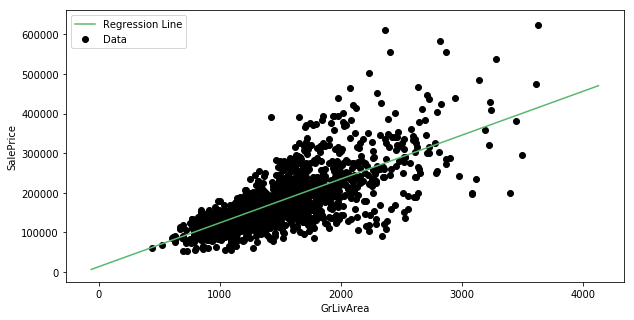

In [38]:
df = read_to_df(train_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)] 
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values 
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function 
training_y = np.array([Y])
training_x = np.array([X])
weights = least_squares_weights(training_x, training_y) 
print(weights)

max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

### 5.- Interpretation using statistics tools

To get a sense of how well the line fits the data, compute the <i><b>RMSE</b> (Root Mean Square Error)</i> and the $R^2$ statistic.


* The <b>RMSE</b> is square root of the average residual squared error (i.e., find the total residual squared error divided by the number of samples and then compute the square root). In terms of the notation used so far, this is

<img src="img/rmse.png" width="50%">


* The $R^2$ [statistic (or coefficient of determination)] (https://en.wikipedia.org/wiki/Coefficient_of_determination) is the fraction remaining when the ratio of the sum of the squared residuals to the total sum of squares is substracted from one. The result is a number between 0 and 1 that quantifies how well the regression line explains the data. In effect, this is

<img src="img/r2.png" width="50%">

#### 5.1.- RMSE

In [39]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

53092.48486948662


#### 5.2.- $R^2$

In [40]:
ss_t = 0
ss_r = 0
mean_y = Y.mean()
for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5163484562864966


### 6.- sklearn implementation

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yeilds shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("The weights for the Linear Regression:")
print("Intercept - weights[0][0]:", lr.intercept_)
print("Coefficient - weights[1][0]:", lr.coef_)

The weights for the Linear Regression:
Intercept - weights[0][0]: 13454.066705758654
Coefficient - weights[1][0]: [110.78992341]
